In [12]:
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator

from qiskit_ibm_runtime.fake_provider import FakeAuckland
from qiskit_ibm_runtime import SamplerV2

import matplotlib.pyplot as plt

from utils import export_data_json, generate_output_dir, generate_full_file_path

In [3]:
OUTPUT_PATH = os.path.join(os.getcwd(), 'dynamic-circuit-tests')
generate_output_dir(OUTPUT_PATH)

Creating folder: /home/alexandre/projects/scientific-research-2-qec-and-qem/src/dynamic-circuit-tests


In [4]:
fake_backend = FakeAuckland()
backend = AerSimulator.from_backend(fake_backend)
sampler = SamplerV2(backend=backend)

In [5]:
N_QUBITS = 1
SHOTS = 1000

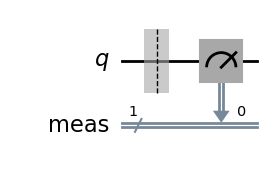

Default Circuit DEPTH: 1


In [7]:
qc_1 = QuantumCircuit(N_QUBITS)
qc_1.measure_all()
display(qc_1.draw('mpl', filename=generate_full_file_path(OUTPUT_PATH, "empty-circuit.png")))
print(f"Default Circuit DEPTH: {qc_1.depth()}")

In [8]:
results = sampler.run([qc_1], shots=SHOTS).result()[0]

In [9]:
counts = results.data.meas.get_counts()
export_data_json(counts, generate_full_file_path(OUTPUT_PATH, "noisy-outputs.json"))

saving /home/alexandre/projects/scientific-research-2-qec-and-qem/src/dynamic-circuit-tests/noisy-outputs.json...


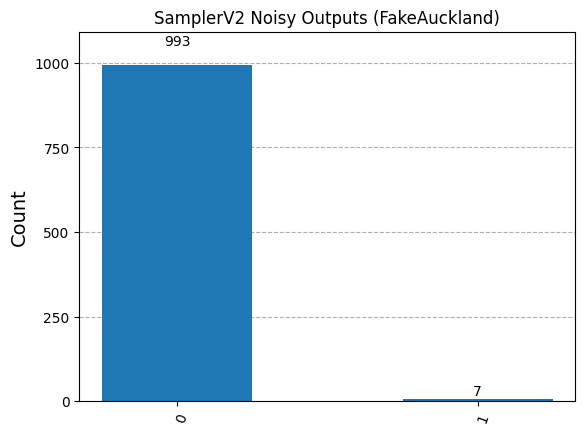

In [10]:
fig = plot_histogram(counts, title="SamplerV2 Noisy Outputs (FakeAuckland)")
fig.savefig(generate_full_file_path(OUTPUT_PATH, "sampler-noisy-ouputs.png"))
display(fig)

---

In [17]:
qubits = QuantumRegister(N_QUBITS, name="q")
meas = ClassicalRegister(N_QUBITS+1, name="meas")

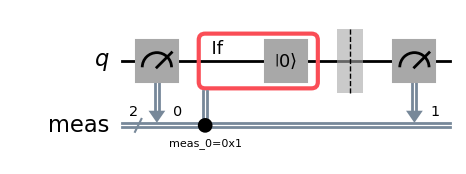

Default Circuit DEPTH: 3


In [21]:
qc_2 = QuantumCircuit(qubits,meas)
qc_2.measure(qubits, meas[0])

with qc_2.if_test((meas[0], 1)):
    qc_2.reset(qubits)

qc_2.barrier()
qc_2.measure(qubits, meas[1])

display(qc_2.draw('mpl', idle_wires=False, filename=generate_full_file_path(OUTPUT_PATH, "empty-dynamic-circuit.png")))
print(f"Default Circuit DEPTH: {qc_2.depth()}")

In [22]:
counts = backend.run(qc_2, shots=SHOTS, dynamic=True).result().get_counts()
counts

{'01': 7, '10': 6, '00': 987}

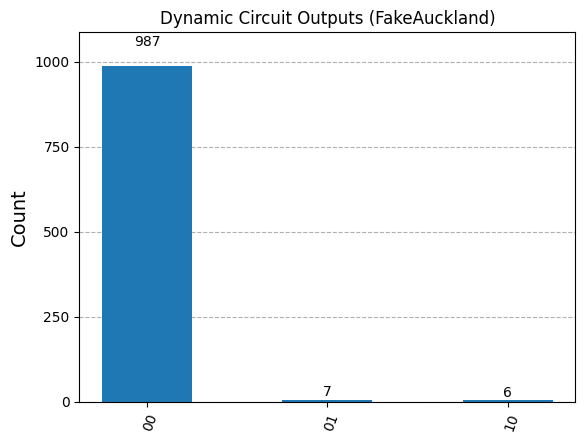

In [23]:
fig = plot_histogram(counts, title="Dynamic Circuit Outputs (FakeAuckland)")
fig.savefig(generate_full_file_path(OUTPUT_PATH, "dynamic-circuit-ouputs.png"))
display(fig)